<a href="https://colab.research.google.com/github/divyanshusingh5/Gender_Identification_From_TWEET/blob/main/Daggers_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALL ALL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
nltk.download('stopwords')

%matplotlib inline

In [ ]:
!pip install Tfidf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Tfidf: filename=tfidf-0.0.6-py3-none-any.whl size=2411 sha256=4c530f9a5c843f65626ddb07884bebf0c4ede0e893ffa466cd8cf28f3d087540
  Stored in directory: /root/.cache/pip/wheels/8b/72/4a/8d8079ffe00a3cae49d05cb28fa94f318ae97276a888e28a68
  Created wheel for etl-utils: filename=etl_utils-0.1.11-py3-none-any.whl size=21643 sha256=a9d59d30f74ba0c6b100f35db83d8eb0625897edf5316c0a0a5940f03904b731
  Stored in directory: /root/.cache/pip/wheels/f4/d1/fa/7f8f0b3bdcced0f1205bac981c449925992e5c785bfcd15dde
  Created wheel for progressbar: filename=progressbar-2.2-py3-none-any.whl size=6464 sha256=0fe700343546f6925837ddb251339d6851da6fce4d75ac0177b811143d86fea8
  Stored in directory: /root/.cache/pip/wheels/ed/19/57/6fd2895583ffe9b5663099963c99f4a3e3d226c6d8c1c718c0
  Created wheel for pysingleton: filename=pysingleton-0.2.1-py3-none-any.whl size=2196 sha256=f8a446646b67b1ac2d6affe62

Reading the dataset


In [ ]:
#reading the dataset
df = pd.read_csv("gender-classifier-DFE-791531.csv",encoding="latin1") #Reading dataset
df.shape

(20050, 26)

In [ ]:
# Drop unnecessary columns/features
df.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  name                   20050 non-null  object 
 12  profile_yn_gold        50 non-null     object 
 13  retweet_count          20050 non-null  int64  
 14  sidebar_color          20050 non-null  object 
 15  te

In [ ]:
df.head()


,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text,tweet_count
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...,31462


In [ ]:
df['gender'].value_counts()


female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [ ]:
#we should remove the rows with unknown gender
drop_items_idx = df[df['gender'] == 'unknown'].index
df.drop (index = drop_items_idx, inplace = True)
df['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [ ]:
print ('profile_yn information:\n',df['profile_yn'].value_counts())

df[df['profile_yn'] == 'no']['gender']

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
        ... 
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [ ]:
drop_items_idx = df[df['profile_yn'] == 'no'].index

df.drop (index = drop_items_idx, inplace = True)

print (df['profile_yn'].value_counts())

df.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [ ]:
print ('Full data items: ', df.shape)
#remoce rows with confidence less than 100%
print ('Data with label-confidence < 100%: ', df[df['gender:confidence'] < 1].shape)

Full data items:  (13804, 14)
Data with label-confidence < 100%:  (0, 14)


In [ ]:
drop_items_idx = df[df['gender:confidence'] < 1].index

df.drop (index = drop_items_idx, inplace = True)
print (df['gender:confidence'].value_counts())

1.0    13804
Name: gender:confidence, dtype: int64


In [ ]:
import re
def normalize_text(s):
    s = str(s)
    s = s.lower()
    s = re.sub('[^\x00-\x7F]+',' ',s)
    
    # Remove URLs
    s= re.sub('https?:\/\/.*[\r\n]*', ' ',s)
    
    # Remove special chars.
    s= re.sub('[?!+%{}:;.,"\'()\[\]_]', '',s)
    
    # Remove double spaces.
    s= re.sub('\s+',' ',s)
    
   
    
    return s

df['text_norm'] = [normalize_text(s) for s in df['text']]
#df['description_norm'] = [normalize_text(s) for s in df['description']]

In [ ]:
df_confident = df[df['gender:confidence']==1]
df_confident.shape

(13804, 15)

In [ ]:
#remove stopwords and split the data into words
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df_confident['text_norm'] = df_confident['text_norm'].astype(str).str.lower().str.split()
df_confident['text_norm'] = df_confident['text_norm'].apply(lambda x : [item for item in x if item not in stop])
df_confident.head()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,description,fav_number,gender_gold,link_color,name,retweet_count,sidebar_color,text,tweet_count,text_norm
0,False,finalized,3,male,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw..."
1,False,finalized,3,male,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,"[felt, like, friends, living, story]"
3,False,finalized,3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,"[hi, @jordanspieth, -, looking, url, -, use, @..."
4,False,finalized,3,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462,"[watching, neighbours, sky, catching, neighbs,..."
5,False,finalized,3,female,1.0,you don't know me.,3901,NaN,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair...",20036,"[ive, seen, people, train, lamps, chairs, tvs,..."


In [ ]:
Male = df_confident[df_confident['gender'] == 'male']
Female = df_confident[df_confident['gender'] == 'female']
Brand = df_confident[df_confident['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['text_norm'].astype(str)).lower().split(" ")).value_counts()[:10]
Female_Words = pd.Series(' '.join(Female['text_norm'].astype(str)).lower().split(" ")).value_counts()[:10]
Brand_words = pd.Series(' '.join(Brand['text_norm'].astype(str)).lower().split(" ")).value_counts()[:10]

Counting the frequency of words used by female
**bold text**

'im',        408
'like',      309
'get',       267
'one',       208
'day',       200
'dont',      190
'love',      172
'people',    161
'go',        145
'-',         143
dtype: int64

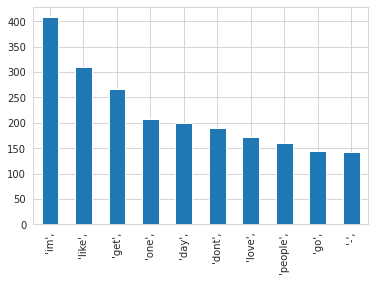

In [ ]:
Female_Words.plot(kind='bar',stacked=True)
Female_Words

Counting the frequency of words used by male
**bold text**

'like',      242
'get',       227
'im',        221
'-',         202
'dont',      166
'new',       150
'one',       144
'time',      135
'go',        123
'people',    120
dtype: int64

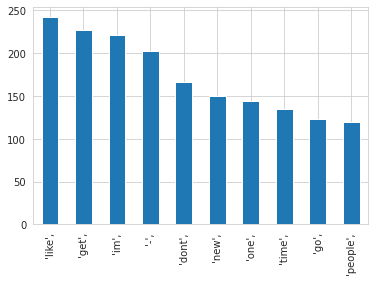

In [ ]:
Male_Words.plot(kind='bar',stacked=True)
Male_Words

Counting the frequency of words used by Brand

'weather',    1078
['get',        553
'updates',     541
'channel',     539
'-',           270
dtype: int64

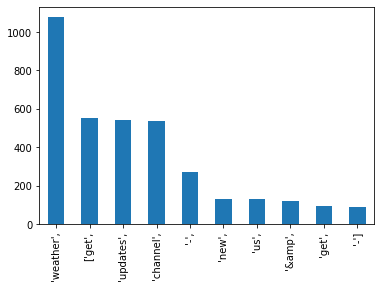

In [ ]:
Brand_words.plot(kind='bar',stacked=True)
Brand_words.head()

most common words without removing stopwords


In [ ]:
from collections import Counter

twit_vocab = Counter()
for twit in df['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1
        
text=twit_vocab.most_common(20)


Most common words after removing stop words


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [ ]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


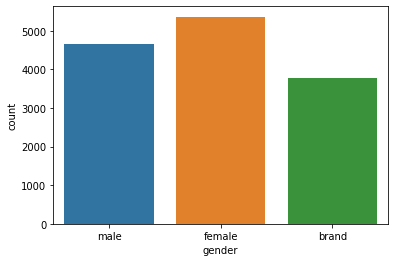

In [ ]:
#plot the count of each gender
sns.countplot(df['gender'],label="Gender")

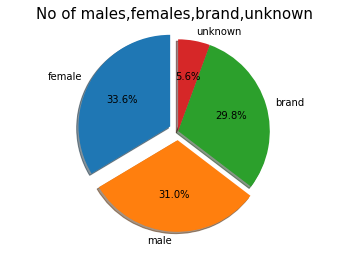

In [ ]:
labels = 'female', 'male', 'brand', 'unknown' 
sizes = [6700, 6194, 5942, 1117]
explode = (0.1, 0.1, 0, 0)  # only "explode" the 1st and 2nd slice (i.e. 'Females','Males')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('No of males,females,brand,unknown',fontsize=15)
plt.show()

# Plot of link color of Male


In [ ]:
male_top_link_color = df[df['gender'] == 'male']['link_color'].value_counts().head(7)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_top_link_color, y = male_top_link_color_idx, palette=list(map(l, male_top_color)))

NameError: ignored

#Plot of top link color of Female-







['0084B4' '9266CC' 'F5ABB5' 'DD2E44' 'FF0000' '3B94D9' 'ABB8C2']


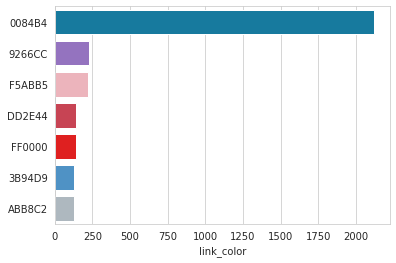

In [ ]:
female_top_link_color = df[df['gender'] == 'female']['link_color'].value_counts().head(7)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values
print(female_top_color)
l = lambda x: '#'+x
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_top_link_color, y = female_top_link_color_idx, palette=list(map(l, female_top_color)))

#bar plot of retweet count by each gender


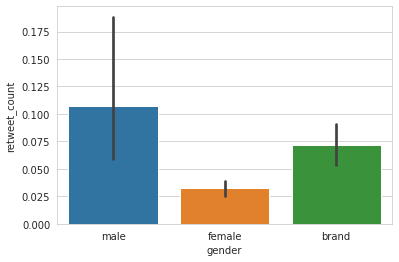

In [ ]:
sns.barplot (x = 'gender', y = 'retweet_count',data = df)

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


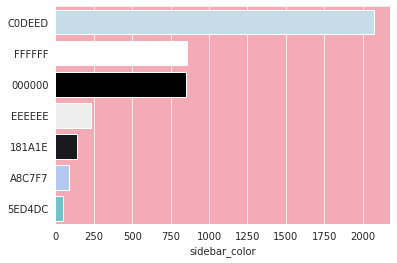

In [ ]:
#top side colour plot for male and female
male_top_sidebar_color = df[df['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color, palette=list(map(l, male_top_color)))

Text(0, 0.5, 'Number of tweets')

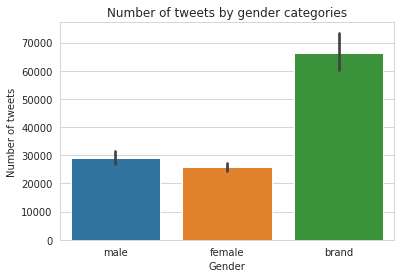

In [ ]:
#Bar chart of gender column showing tweet_count for different categories

sns.set_style("whitegrid")
ax = sns.barplot(x="gender", y="tweet_count", data=df)
# Label the axes and provide a title
ax.set_title('Number of tweets by gender categories')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of tweets')

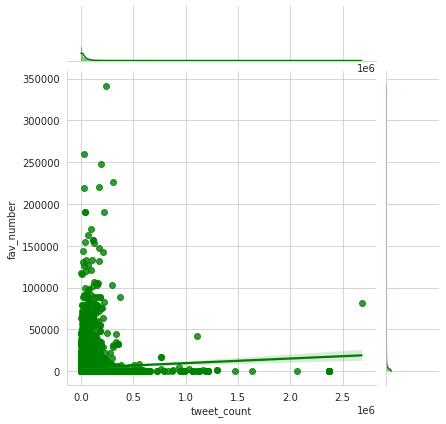

In [ ]:
'''jointplot: This method is used to display data points according to two variables, along with both their distributions, kernel density estimators, and an optional regression that fits the data. With reg we indicate that we want a regression fit to the data.
'''

sns.jointplot(data=df, x='tweet_count', y='fav_number', kind='reg', color='g')
plt.show()

In this case, although there appears to be a small tendency upwards shown by the regression, there appears to be almost no correlation between the variables “age” and “fare”, as shown by the Pearsoncorrelation coefficient.


In [ ]:
# Define a function to create the scatterplot. 

def scatterplot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()  # Create the plot object
    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


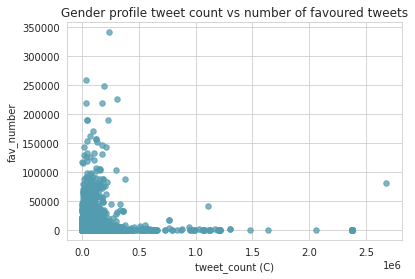

In [ ]:
# Call the function to create plot
scatterplot(x_data =df['tweet_count']
            , y_data =df['fav_number']
            , x_label = 'tweet_count (C)'
            , y_label = 'fav_number'
            , title = 'Gender profile tweet count vs number of favoured tweets')

In [ ]:
''' 2.3 Bar Plot
The simple bar plot is best used when there is just one level of grouping to your variable Box Plot
Box plots are most suited to displaying the distribution of a variable across multiple groups. The bottom and top of the boxes
indicate the lower and upper quartiles, respectively, and the line inside the box is for the median. Vertical lines extending
from the boxes ("whiskers") show the range of the data (by default, this is 1.5x past the upper and lower quartiles in matplotlib).
Box plots can be thought of as a hybrid between bar plots and overlaid histograms. They surface much of the same information as bar
plots, but they also expose the variation in the data. However, they do not show the underlying distribution of the data.
'''
beee ='bee'

In [ ]:
ax = sns.boxplot(x="gender", y="tweet_count", data=gender_exp_df)


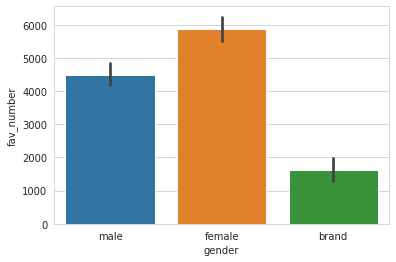

In [ ]:
#bar plot of Favtweet count by each gender
sns.barplot (x = 'gender', y = 'fav_number',data = df)

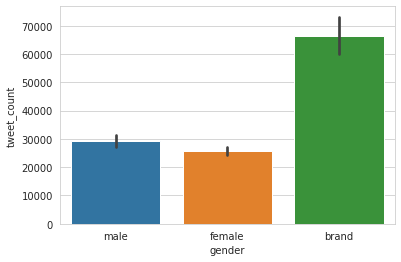

In [ ]:
#bar plot of Favtweet count by each gender
sns.barplot (x = 'gender', y = 'tweet_count',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



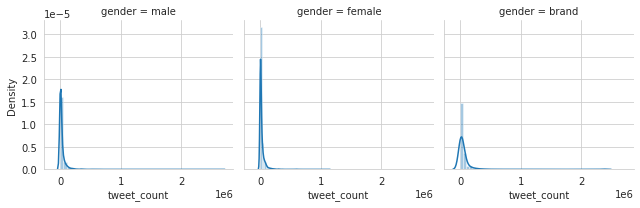

In [ ]:
# histogram of tweet count using facet to show histogram for different categories of gender

g = sns.FacetGrid(df, col='gender')
g.map(sns.distplot, "tweet_count")
plt.show()

#Label_Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['gender'])

# split the dataset in train and test
X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train.head()

19087    @rvpisarapist my players literally give 110% a...
11212    Backers of the atrium lobby considered joining...
14799    I was supposed to receive my @SpiritHalloween ...
6846     Depression comes when you least expect it, lik...
1226     Grimes Throws a Fun, Bloody Party in "Flesh Wi...
Name: text, dtype: object

#Random forest

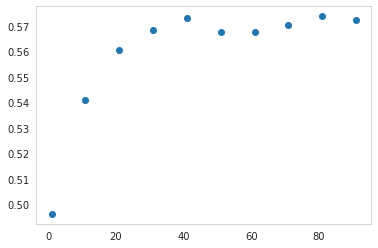

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)


In [ ]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators =40, random_state=100))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy by Random Forest CLassification:',accuracy_score(y_test,predictions))

Accuracy by Random Forest CLassification: 0.5648081100651702


CONCATINATING TEXT WITH DESCRIPTION

In [ ]:
#Fill NaN with empty string
df.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
df['text_description'] = df['text'].str.cat(df['description'], sep=' ')

df['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13804
Name: text_description, dtype: int64

Random Forest

In [ ]:
# split the dataset in train and test
X = df['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train.head()

19087    @rvpisarapist my players literally give 110% a...
11212    Backers of the atrium lobby considered joining...
14799    I was supposed to receive my @SpiritHalloween ...
6846     Depression comes when you least expect it, lik...
1226     Grimes Throws a Fun, Bloody Party in "Flesh Wi...
Name: text_description, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy by Random Forest Classification:',accuracy_score(y_test,predictions))

Accuracy by Random Forest Classification: 0.6438918396909705


Confusion Metrix

In [ ]:
y_pred = clf.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 883,  147,  106],
       [ 108, 1339,  163],
       [ 143,  808,  445]])

In [ ]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,All
True,,,,
0,883,147,106,1136
1,108,1339,163,1610
2,143,808,445,1396
All,1134,2294,714,4142


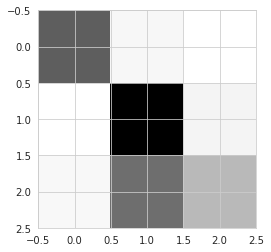

In [ ]:
import matplotlib.pyplot as plt
import sklearn
conf = sklearn.metrics.confusion_matrix(y_true, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

#Precison recall F1-Score

In [ ]:
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1136
           1       0.66      0.74      0.70      1610
           2       0.64      0.48      0.55      1396

    accuracy                           0.68      4142
   macro avg       0.68      0.69      0.68      4142
weighted avg       0.68      0.68      0.67      4142



#2.**SVM**

In [ ]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
sclf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
sclf.fit(X_train, y_train)

predictions = sclf.predict(X_test)
print('Accuracy by SVM:',accuracy_score(y_test,predictions))

Accuracy by SVM: 0.6868662481892805


Confusion Metrix

In [ ]:
y_pred = sclf.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 952,   82,  102],
       [ 117, 1169,  324],
       [ 178,  494,  724]])

In [ ]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,All
True,,,,
0,952,82,102,1136
1,117,1169,324,1610
2,178,494,724,1396
All,1247,1745,1150,4142


Precision Recall F1 Score

In [ ]:
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1136
           1       0.67      0.73      0.70      1610
           2       0.63      0.52      0.57      1396

    accuracy                           0.69      4142
   macro avg       0.69      0.69      0.69      4142
weighted avg       0.68      0.69      0.68      4142



#3.Logestic Regression

```
# This is formatted as code
```



In [ ]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
lclf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

lclf.fit(X_train, y_train)

predictions = lclf.predict(X_test)
print('Accuracy by Logistic Regression:',accuracy_score(y_test,predictions))

Accuracy by Logistic Regression: 0.6820376629647513


In [ ]:
y_pred = lclf.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 959,   80,   97],
       [ 137, 1193,  280],
       [ 191,  532,  673]])

In [ ]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,All
True,,,,
0,959,80,97,1136
1,137,1193,280,1610
2,191,532,673,1396
All,1287,1805,1050,4142


Precision Recall F1Score 

In [ ]:
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1136
           1       0.67      0.73      0.70      1610
           2       0.63      0.52      0.57      1396

    accuracy                           0.69      4142
   macro avg       0.69      0.69      0.69      4142
weighted avg       0.68      0.69      0.68      4142



#4.Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:

blogs_df=df
blogs_df.head()
# GENDER PREDICTION
# balance the dataset
source_male=blogs_df.loc[blogs_df['gender'] == "male"]
source_female=blogs_df.loc[blogs_df['gender'] == "female"]
source_male=source_male.sample(n=2000)


source=pd.concat([source_male,source_female], ignore_index=True)
source.groupby(['gender']).agg(['count'])


# USE COUNT VECTORIZER FOR GENDER
print (" USING COUNT VECTORIZER")
train, test = train_test_split(source, test_size=0.20)
vt = CountVectorizer(max_features=100)
vector = vt.fit_transform(train['text'].values).toarray()
test_vector = vt.transform(test['text'].values)
train_gender=train['gender']
test_gender=test['gender']

# multinomial Naive Bayes clasifier
print ("PREDICTIONS FOR GENDER")

clf = MultinomialNB()
model = clf.fit(vector, train_gender.values)
prediction = model.predict(test_vector)
test_list=test_gender.to_list()
testscores = metrics.accuracy_score(prediction,test_list)
confusion = metrics.confusion_matrix(prediction,test_list)
print ("Multinomial Naive Bayes Classifier")
print("accuracy:%.2f%%" %(testscores*100))
print(metrics.classification_report(prediction,test_list,digits=2))
print(confusion)

 USING COUNT VECTORIZER
PREDICTIONS FOR GENDER
Multinomial Naive Bayes Classifier
accuracy:71.10%
              precision    recall  f1-score   support

      female       0.95      0.73      0.82      1377
        male       0.11      0.51      0.19        97

    accuracy                           0.71      1474
   macro avg       0.53      0.62      0.51      1474
weighted avg       0.90      0.71      0.78      1474

[[999 378]
 [ 48  49]]


#Model Esembling

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=42)
clf2 = RandomForestClassifier(n_estimators = 80, random_state=42)
clf3 = SVC(kernel = 'linear',probability = True, random_state=42)

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy after ensemble modelling:',accuracy_score(y_test,predictions))

Accuracy after ensemble modelling: 0.6895219700627716


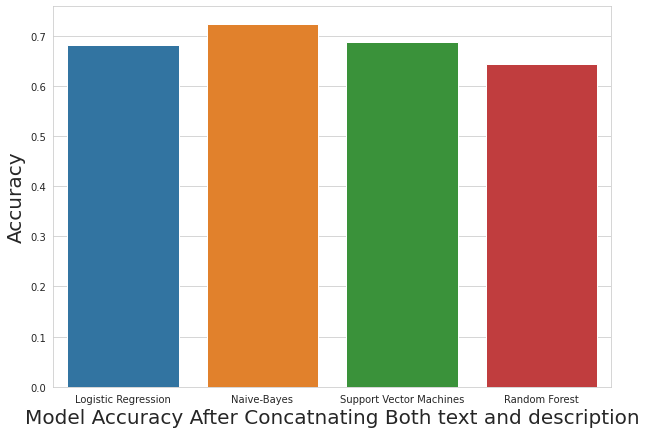

In [ ]:
accuracies=[0.6820376629647513, 0.7225548902195609,0.6868662481892805,0.6438918396909705 ]
models=["Logistic Regression","Naive-Bayes","Support Vector Machines", "Random Forest"]
plt.figure(figsize=(10,7))
sns.barplot(x=models,y=accuracies)
plt.xlabel('Model Accuracy After Concatnating Both text and description',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()


Accuracy after using only Text

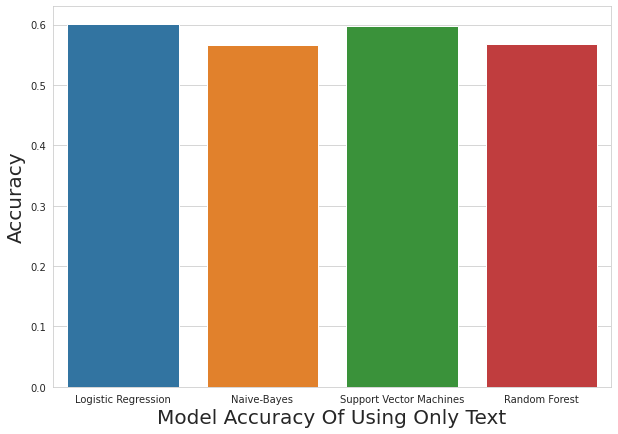

In [ ]:
accuracies=[0.6001931434089812,0.56617093191694,0.5982617093191694,0.5676001931434089 ]
models=["Logistic Regression","Naive-Bayes","Support Vector Machines", "Random Forest"]
plt.figure(figsize=(10,7))
sns.barplot(x=models,y=accuracies)
plt.xlabel('Model Accuracy Of Using Only Text',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()

In [ ]:
import time 

In [ ]:
start=time.time()
s=lclf.predict(X_test)
end=time.time()
print("Time Taken By Logestic Regression:",end-start)


Time Taken By Logestic Regression: 2.7813093662261963


In [ ]:
first=time.time()
clf.predict(X_test)
last=time.time()
print("Time Taken By Random Forest:",(last-first))

Time Taken By SVM: 2.3625004291534424


In [ ]:
t=time.time()
sclf.predict(X_test)
z=time.time()
print("Time Taken By SVM:",(z-t))

Time Taken By Random Forest: 12.747490644454956


In [ ]:
f=time.time()
clf.predict(X_test)
l=time.time()
print("Time Taken By Naive Bayes:",(l-f))

Time Taken By Naive Bayes: 2.3741278648376465


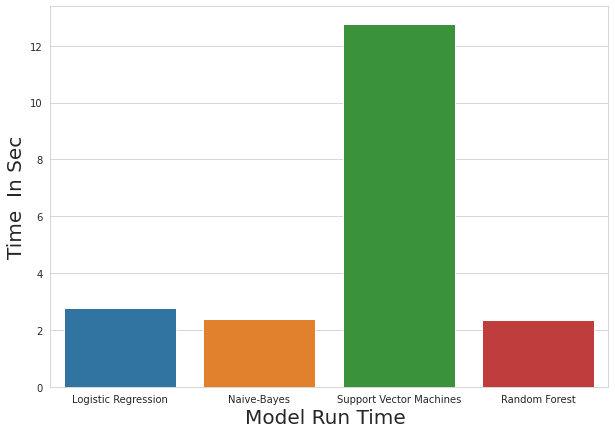

In [ ]:
accuracies=[2.7813093662261963,2.3741278648376465,12.747490644454956,2.3625004291534424 ]
models=["Logistic Regression","Naive-Bayes","Support Vector Machines", "Random Forest"]
plt.figure(figsize=(10,7))
sns.barplot(x=models,y=accuracies)
plt.xlabel('Model Run Time ',fontsize=20)
plt.ylabel('Time  In Sec',fontsize=20)
plt.show()